In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
!pip install Xgboost

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder , OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

In [8]:
df = pd.read_csv('C:/Users/Lokesh/Desktop/Oasis Infobite/Task 6/WineQT.csv')

In [10]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
155,7.5,0.49,0.19,1.9,0.076,10.0,44.0,0.99570,3.39,0.54,9.7,5,218
791,7.1,0.39,0.12,2.1,0.065,14.0,24.0,0.99252,3.30,0.53,13.3,6,1118
689,9.5,0.86,0.26,1.9,0.079,13.0,28.0,0.99712,3.25,0.62,10.0,5,981
878,7.5,0.61,0.20,1.7,0.076,36.0,60.0,0.99494,3.10,0.40,9.3,5,1240
254,12.6,0.38,0.66,2.6,0.088,10.0,41.0,1.00100,3.17,0.68,9.8,6,359


In [12]:
df.head

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075  

In [14]:
df = df.drop(['Id'],axis=1)

In [16]:
df['quality'].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

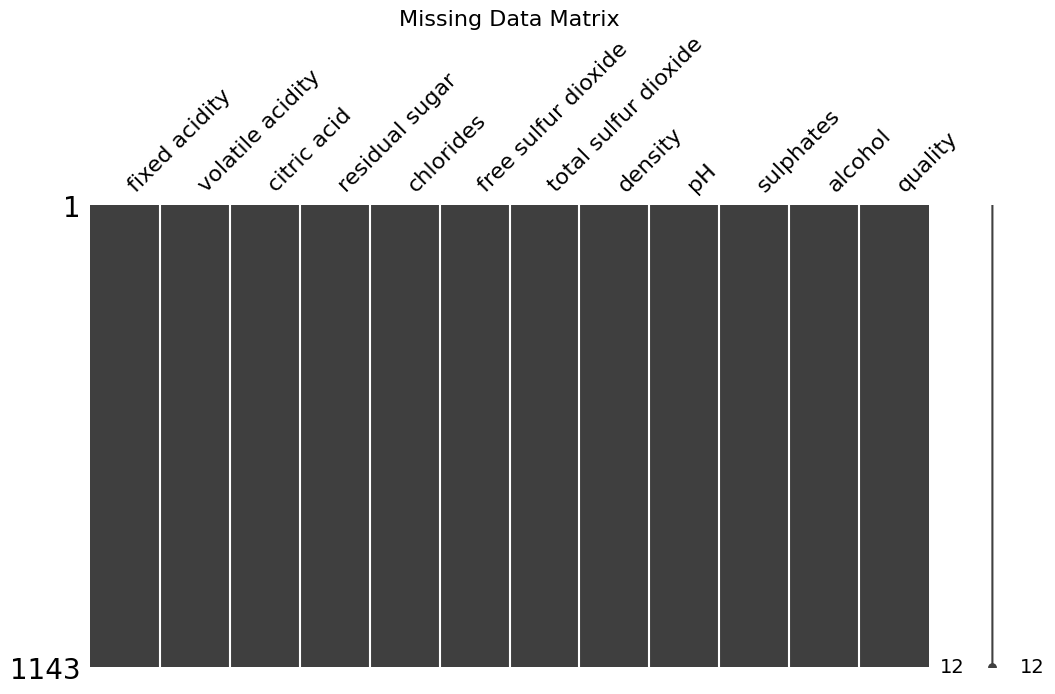

In [30]:
import missingno as msno

# Matrix plot for missing data
msno.matrix(df, figsize=(12, 6), sparkline=True)
plt.title('Missing Data Matrix', fontsize=16)
plt.show()


In [32]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [34]:
x= df.drop(['quality'],axis=1)
y= df['quality']

In [36]:
smote = SMOTE(random_state=42, k_neighbors=1)
x_sampled , y_sampled = smote.fit_resample(x,y)

In [38]:
df_sampled = pd.DataFrame(x_sampled, columns=x.columns)

In [40]:
df = pd.concat([df_sampled,y_sampled],axis=1)

In [42]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [44]:
df['quality'].value_counts()

quality
5    483
6    483
7    483
4    483
8    483
3    483
Name: count, dtype: int64

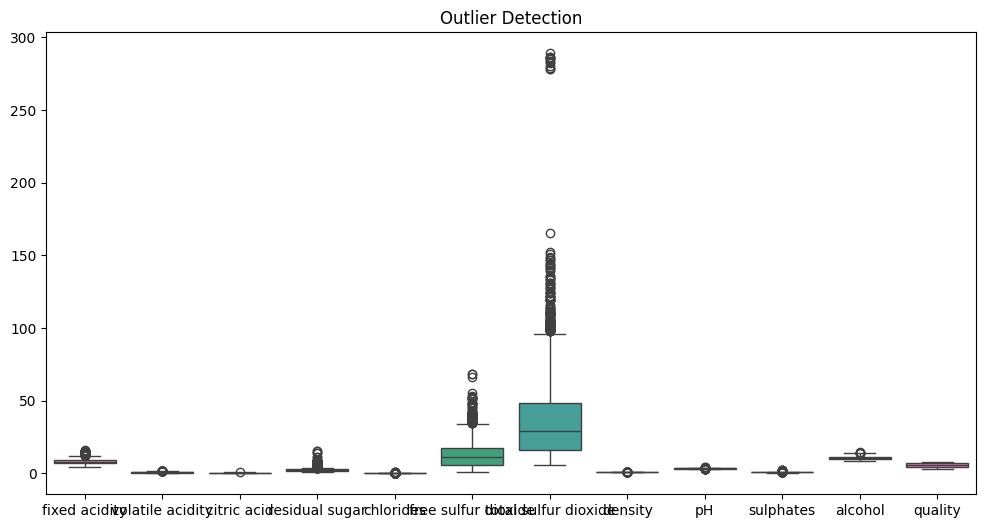

In [46]:
plt.figure(figsize=(12,6))
sns.boxplot(df)
plt.title('Outlier Detection')
plt.show()

In [48]:
def Outlier_r(columns,df):

    for col in columns:

        Q1 = df[col].quantile(0.25)

        Q3 = df[col].quantile(0.75)

        

        IQR = Q3 - Q1

        

        lowerbound = Q1 - (1.5 * IQR)

        upperbound = Q3 + (1.5 * IQR)

        

        df = df[(df[col] >= lowerbound) & (df[col] <= upperbound)]

    return df

In [50]:
x=df.drop(['quality'],axis=1)

In [52]:
n_col = x.columns

In [54]:
n_col

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [56]:
df = Outlier_r(n_col,df)

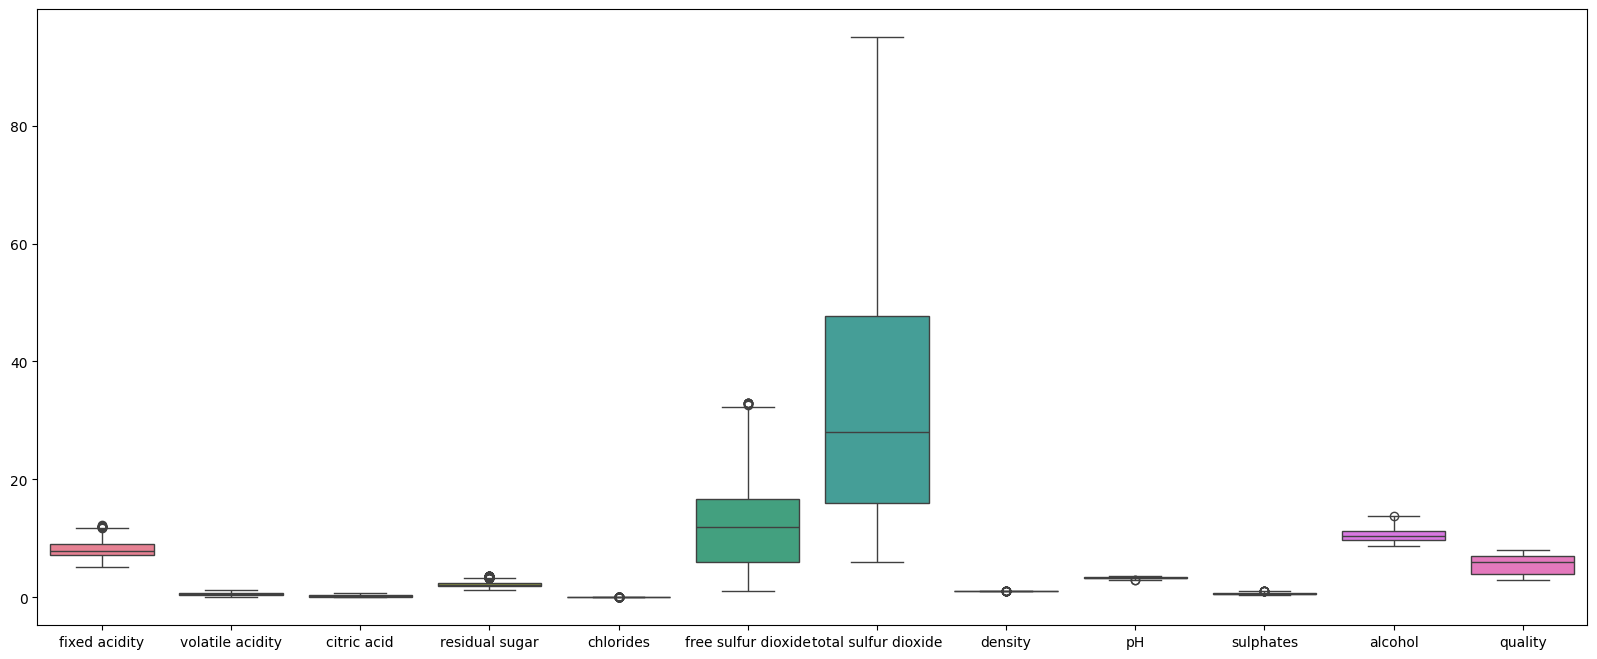

In [64]:
plt.figure(figsize=(20,8))
sns.boxplot(df)
plt.show()


In [66]:
def percent(cols , df):

    for col in cols:

        lowerbound = df[col].quantile(0.01)

        upperbound = df[col].quantile(0.99)

        

        df = df[(df[col] >= lowerbound) & (df[col] <= upperbound)]

    return df

In [68]:
df = percent(n_col,df)

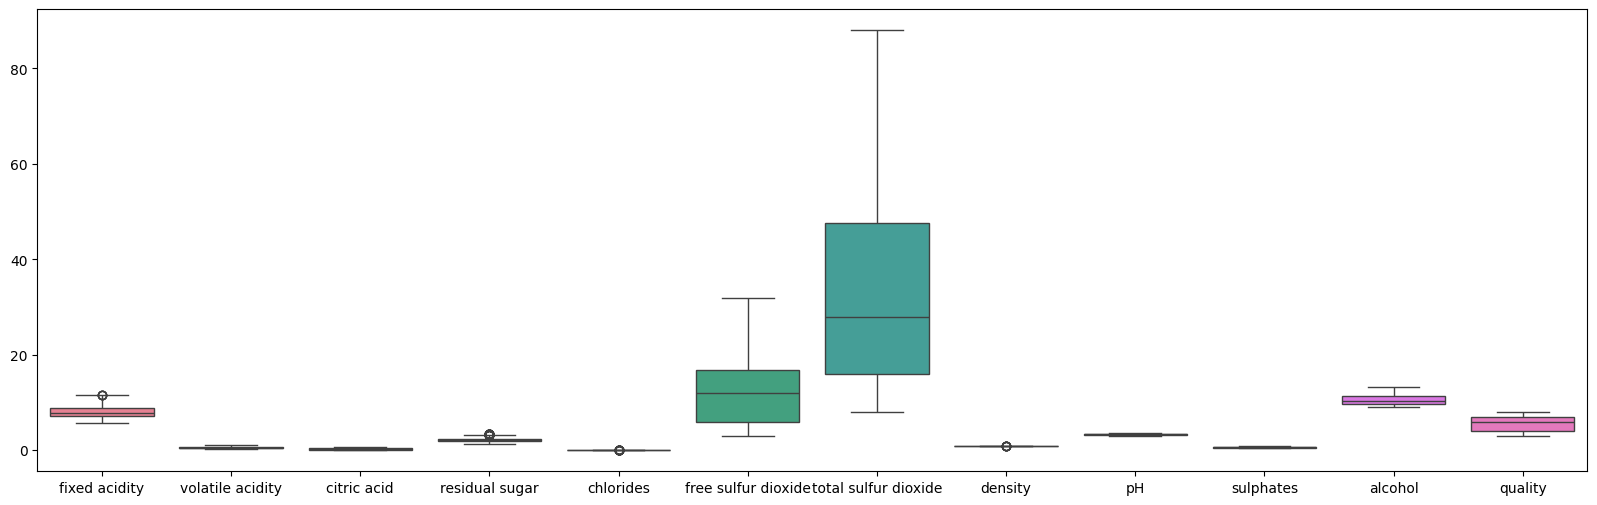

In [70]:
plt.figure(figsize=(20,6))
sns.boxplot(df)
plt.show()

In [72]:
df['fixed acidity'].skew()

0.5847999097785572

In [74]:
from scipy.stats import boxcox

df['fixed acidity'], lambda_boxcox = boxcox(df['fixed acidity'])

In [76]:
df['volatile acidity'].skew()

0.47470980536432683

In [78]:
df['volatile acidity'], lambda_boxcox = boxcox(df['volatile acidity'])

In [80]:
df['citric acid'].skew()

0.12698759716436162

In [82]:
df['citric acid'] = df['citric acid'] +1

In [84]:
df['citric acid'], lambda_boxcox = boxcox(df['citric acid'])

In [86]:
df['residual sugar'].skew()

0.8312798787704853

In [88]:
df['residual sugar'], lambda_boxcox = boxcox(df['residual sugar'])

In [90]:
n_col

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [92]:
df['chlorides'].skew()

0.6334661969248199

In [94]:
df['chlorides'], lambda_boxcox = boxcox(df['chlorides'])

In [96]:
df['free sulfur dioxide'].skew()

0.7713261116622478

In [98]:
df['free sulfur dioxide'], lambda_boxcox = boxcox(df['free sulfur dioxide'])

In [100]:
df['total sulfur dioxide'].skew()

0.9060191348501706

In [102]:
df['total sulfur dioxide'], lambda_boxcox = boxcox(df['total sulfur dioxide'])

In [104]:
df['density'].skew()

0.11941371940295621

In [106]:
df['density'], lambda_boxcox = boxcox(df['density'])

In [108]:
df['sulphates'].skew()

0.6209985629196897

In [110]:
df['sulphates'], lambda_boxcox = boxcox(df['sulphates'])

In [112]:
df['alcohol'].skew()

0.4894671679765137

In [114]:
df['alcohol'], lambda_boxcox = boxcox(df['alcohol'])

In [116]:
df['pH'].skew()

0.38872591924358246

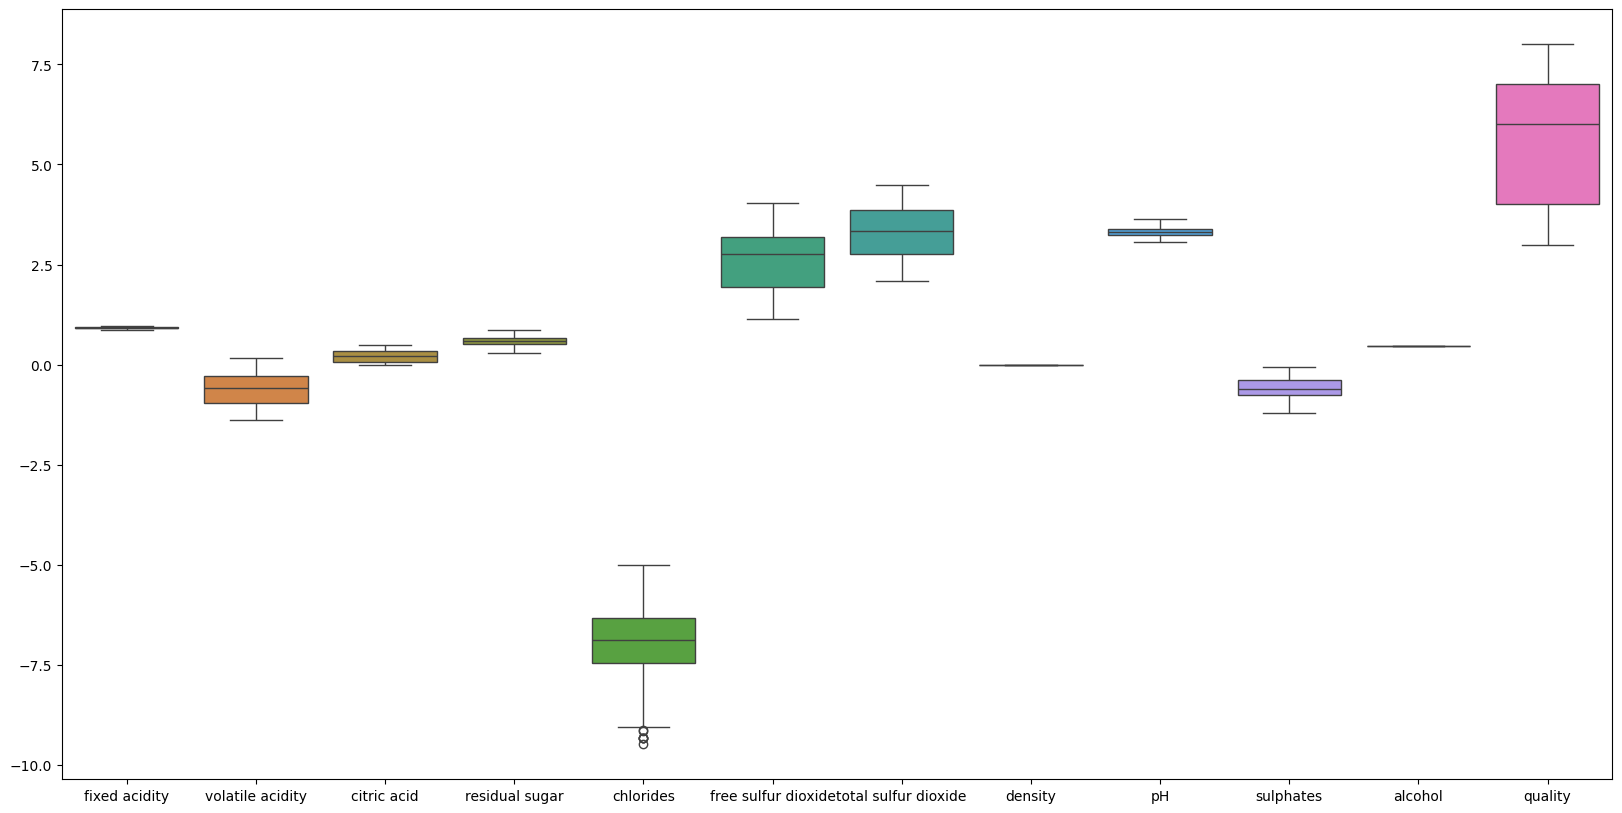

In [122]:
plt.figure(figsize=(20,10))
sns.boxplot(df)
plt.show()

In [124]:
x = df.drop(['quality'],axis=1)
y=df['quality']


In [126]:
x_sampled , y_sampled = smote.fit_resample(x,y)
df_sampled = pd.DataFrame(x_sampled, columns=x.columns)
df = pd.concat([df_sampled,y_sampled],axis=1)

In [128]:
scaler = StandardScaler()

In [130]:
x = df.drop(['quality'],axis=1)
y=df['quality']

In [132]:
x_scaled = scaler.fit_transform(x)

In [134]:
y_scaler = MinMaxScaler()

In [136]:
y.value_counts()

quality
5    338
6    338
7    338
4    338
8    338
3    338
Name: count, dtype: int64

In [138]:
x_train , x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [142]:
from sklearn.model_selection import ShuffleSplit , cross_val_score
cv=ShuffleSplit(n_splits=5, test_size =0.2, random_state=42)
cross_val_score(LogisticRegression(max_iter=5000),x_scaled,y,cv=cv).mean()


0.6620689655172415

In [144]:
LR = LogisticRegression(solver = 'saga', penalty = 'elasticnet', l1_ratio = 0.9, fit_intercept = True, C = 10)

In [146]:
LR.fit(x_train,y_train)

C:\Users\Lokesh\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=10, l1_ratio=0.9, penalty='elasticnet', solver='saga')

In [148]:
LR_pred= LR.predict(x_test)

In [150]:
accuracy_score(y_test,LR_pred)

0.6527093596059114

In [152]:
svc =SVC(kernel = 'rbf', gamma = 'scale', C = 10)

In [154]:
svc.fit(x_train,y_train)

SVC(C=10)

In [156]:
svc_pred = svc.predict(x_test)

In [158]:
accuracy_score(y_test,svc_pred)

0.8768472906403941

In [160]:
DT = DecisionTreeClassifier(min_samples_split = 2, min_samples_leaf = 1, max_depth= 50, criterion= 'entropy')

In [162]:
DT.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=50)

In [164]:
DT_pred = DT.predict(x_test)

In [166]:
accuracy_score(y_test,DT_pred)

0.8325123152709359

In [168]:
RF = RandomForestClassifier(n_estimators = 500, min_samples_split = 2, min_samples_leaf = 2, max_depth= 20, bootstrap= False)

In [170]:
RF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=2,
                       n_estimators=500)

In [172]:
RF_pred = RF.predict(x_test)

In [174]:
accuracy_score(y_test,RF_pred)

0.8990147783251231

In [176]:
GB = GradientBoostingClassifier(subsample = 0.6, n_estimators = 500, min_samples_split = 2, min_samples_leaf = 1, max_depth= 7, learning_rate= 0.05)

In [178]:
GB.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=7, n_estimators=500,
                           subsample=0.6)

In [180]:
GB_pred = GB.predict(x_test)

In [182]:
accuracy_score(y_test,GB_pred)

0.9039408866995073

In [184]:
KN = KNeighborsClassifier(weights = 'distance', n_neighbors = 3, metric = 'manhattan')

In [186]:
KN.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [188]:
KN_pred = KN.predict(x_test)

In [190]:
accuracy_score(y_test,KN_pred)

0.8916256157635468

In [192]:
models = {
    "Logistic Regression": LR,
    "Random Forest": RF,
    "Decision Tree": DT,
    "Kneighbors": KN,
    "Gradient Boosting": GB
}

In [194]:
for model_name, model in models.items():
  if len(np.unique(y_test)) > 2:  # Multi-class case
          roc_auc = roc_auc_score(y_test, model.predict_proba(x_test), multi_class='ovr')
          print(f"ROC AUC for {model_name}: {roc_auc:.4f}")
  print("\n")

ROC AUC for Logistic Regression: 0.9177


ROC AUC for Random Forest: 0.9901


ROC AUC for Decision Tree: 0.8990


ROC AUC for Kneighbors: 0.9583


ROC AUC for Gradient Boosting: 0.9884




Overall ROC AUC for Logistic Regression: 0.9177



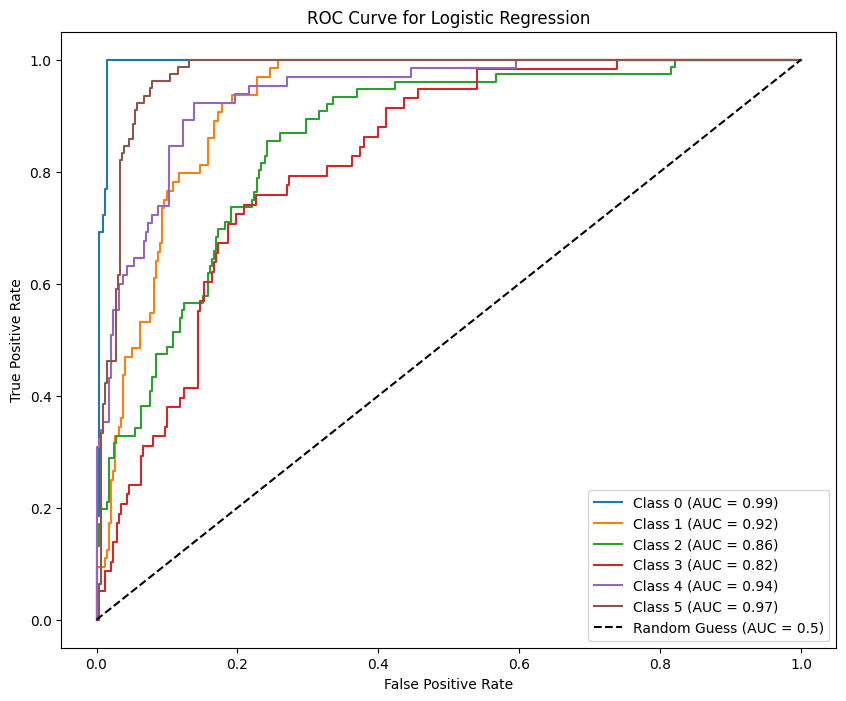

In [196]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]
y_score = LR.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

overall_auc = roc_auc_score(y_test_binarized, y_score, multi_class="ovr")
print(f"Overall ROC AUC for Logistic Regression: {overall_auc:.4f}\n")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.show()

Overall ROC AUC for Decision Tree: 0.8990



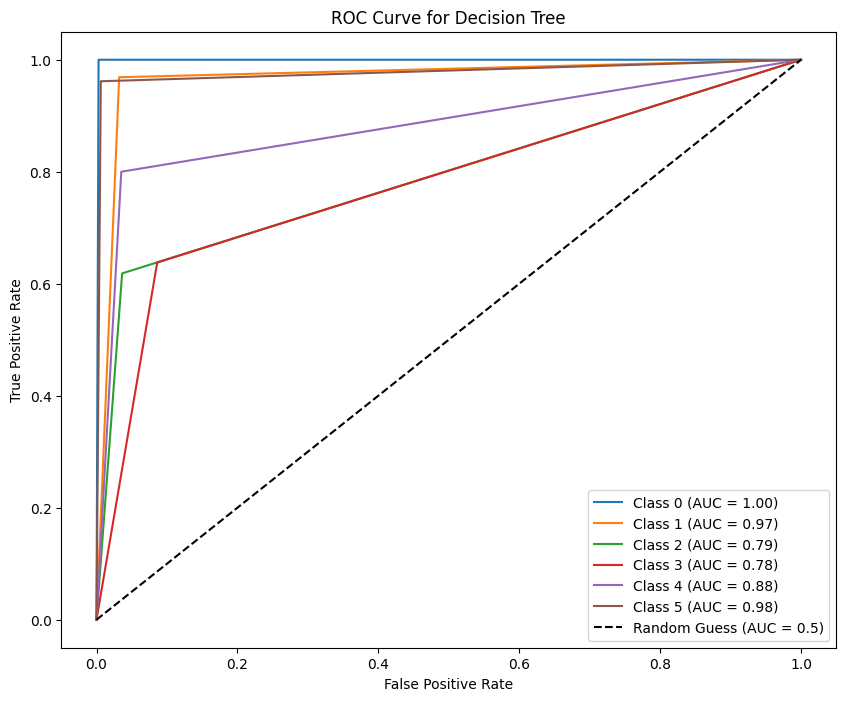

In [198]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]
y_score = DT.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

overall_auc = roc_auc_score(y_test_binarized, y_score, multi_class="ovr")
print(f"Overall ROC AUC for Decision Tree: {overall_auc:.4f}\n")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Decision Tree")
plt.legend(loc="lower right")
plt.show()

Overall ROC AUC for Random Forest: 0.9901



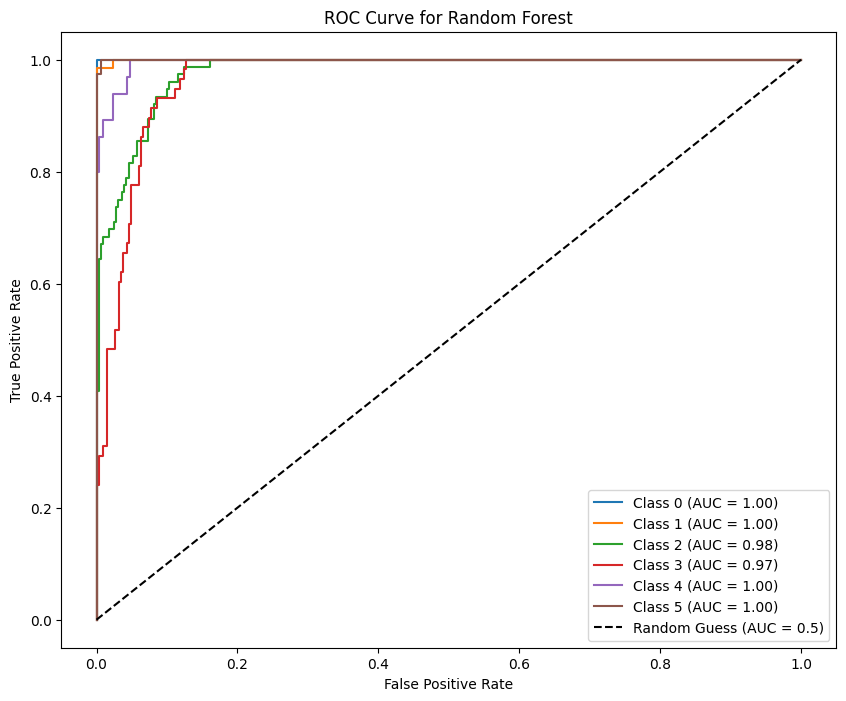

In [200]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]
y_score = RF.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

overall_auc = roc_auc_score(y_test_binarized, y_score, multi_class="ovr")
print(f"Overall ROC AUC for Random Forest: {overall_auc:.4f}\n")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest")
plt.legend(loc="lower right")
plt.show()

Overall ROC AUC for Gradient Boosting Tree: 0.9884



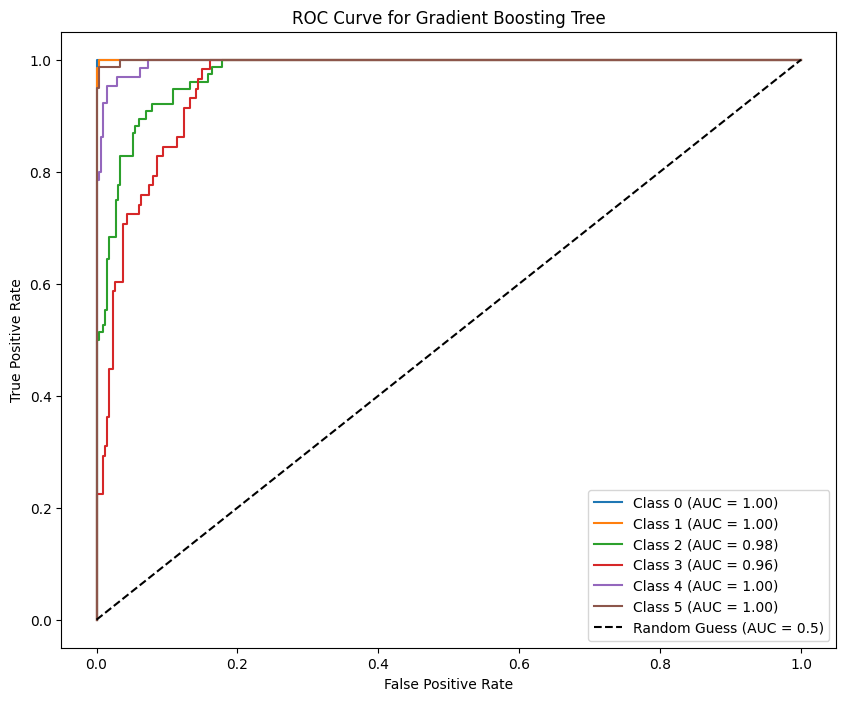

In [202]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]
y_score = GB.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

overall_auc = roc_auc_score(y_test_binarized, y_score, multi_class="ovr")
print(f"Overall ROC AUC for Gradient Boosting Tree: {overall_auc:.4f}\n")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Gradient Boosting Tree")
plt.legend(loc="lower right")
plt.show()

Overall ROC AUC for Support Vector Classifier Model: 0.9585



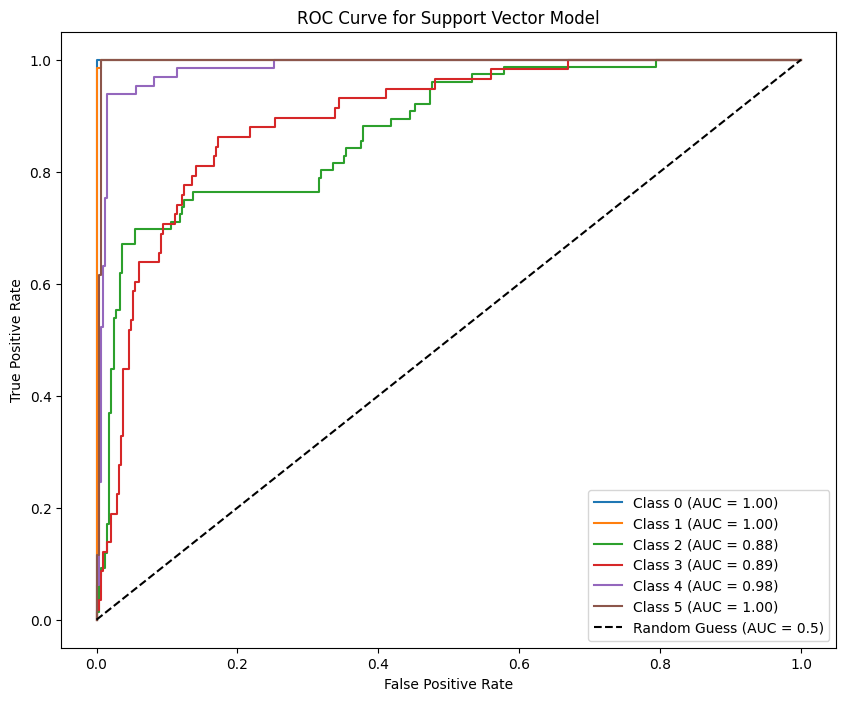

In [204]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]
y_score = svc.decision_function(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

overall_auc = roc_auc_score(y_test_binarized, y_score, multi_class="ovr")
print(f"Overall ROC AUC for Support Vector Classifier Model: {overall_auc:.4f}\n")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Support Vector Model")
plt.legend(loc="lower right")
plt.show()

Overall ROC AUC for Kneighbors Classifier: 0.9583



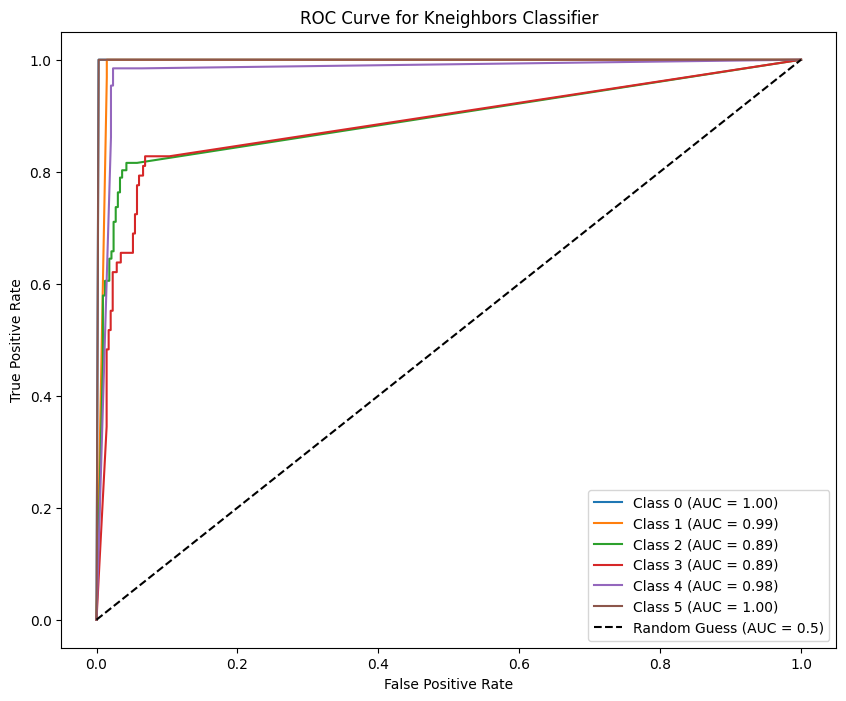

In [206]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]
y_score = KN.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

overall_auc = roc_auc_score(y_test_binarized, y_score, multi_class="ovr")
print(f"Overall ROC AUC for Kneighbors Classifier: {overall_auc:.4f}\n")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Kneighbors Classifier")
plt.legend(loc="lower right")
plt.show()

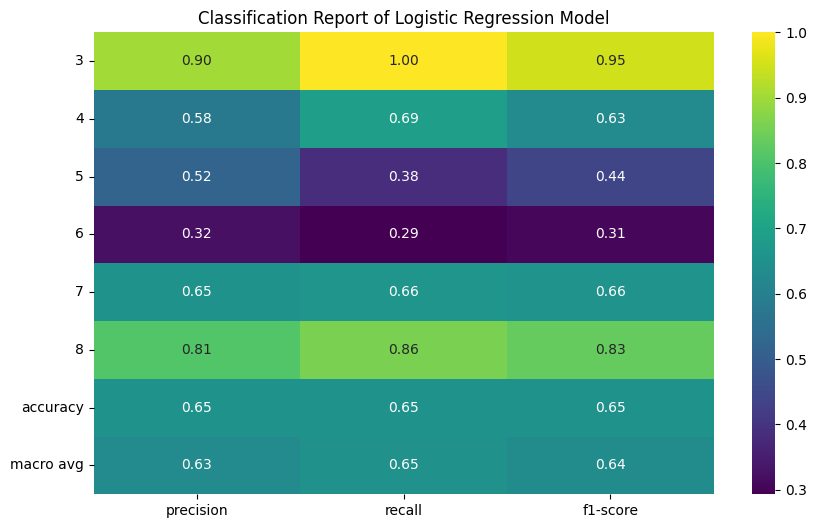

In [208]:
LR_report = classification_report(y_test, LR_pred, output_dict=True)
# Convert the classification report to a DataFrame
LR_report_df = pd.DataFrame(LR_report).transpose()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(LR_report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt=".2f")
plt.title("Classification Report of Logistic Regression Model")
plt.show()


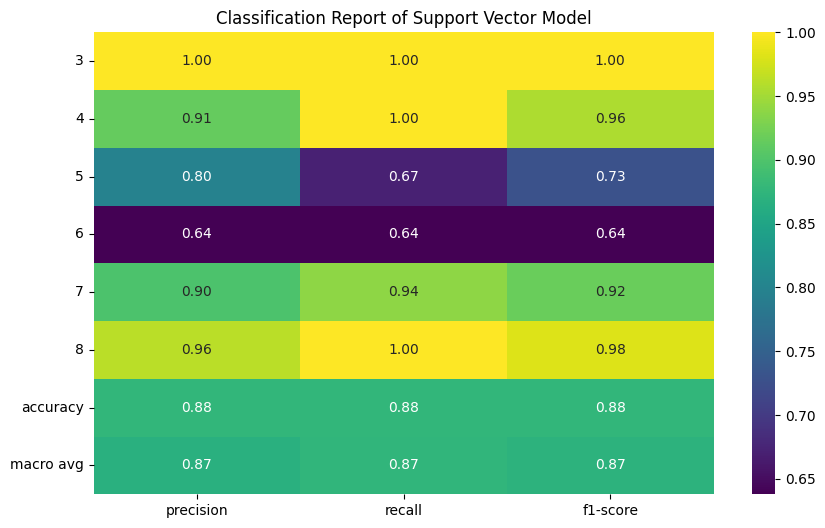

In [210]:
svc_report = classification_report(y_test, svc_pred, output_dict=True)
# Convert the classification report to a DataFrame
svc_report_df = pd.DataFrame(svc_report).transpose()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(svc_report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt=".2f")
plt.title("Classification Report of Support Vector Model")
plt.show()

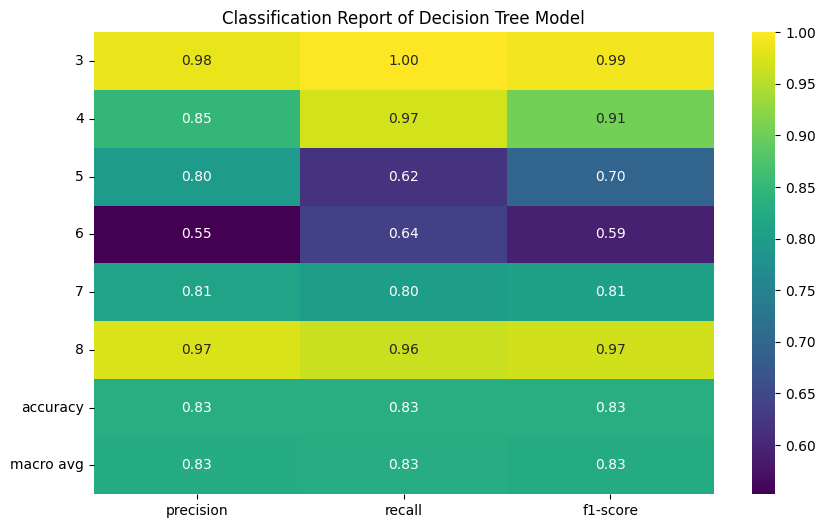

In [212]:
DT_report = classification_report(y_test, DT_pred, output_dict=True)
# Convert the classification report to a DataFrame
DT_report_df = pd.DataFrame(DT_report).transpose()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(DT_report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt=".2f")
plt.title("Classification Report of Decision Tree Model")
plt.show()

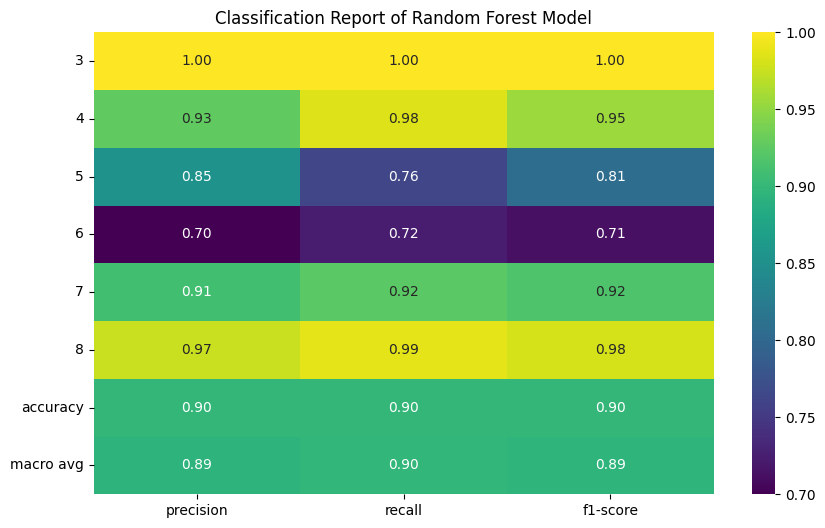

In [214]:
RF_report = classification_report(y_test, RF_pred, output_dict=True)
# Convert the classification report to a DataFrame
RF_report_df = pd.DataFrame(RF_report).transpose()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(RF_report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt=".2f")
plt.title("Classification Report of Random Forest Model")
plt.show()

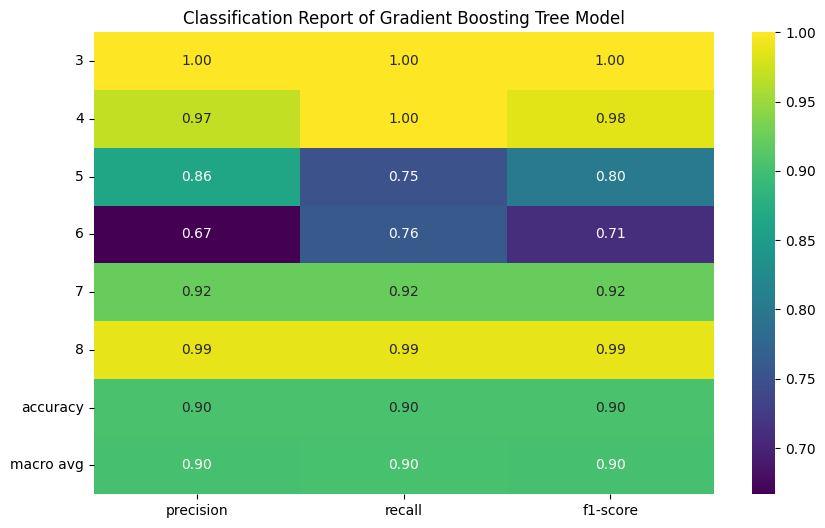

In [216]:
GB_report = classification_report(y_test, GB_pred, output_dict=True)
# Convert the classification report to a DataFrame
GB_report_df = pd.DataFrame(GB_report).transpose()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(GB_report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt=".2f")
plt.title("Classification Report of Gradient Boosting Tree Model")
plt.show()

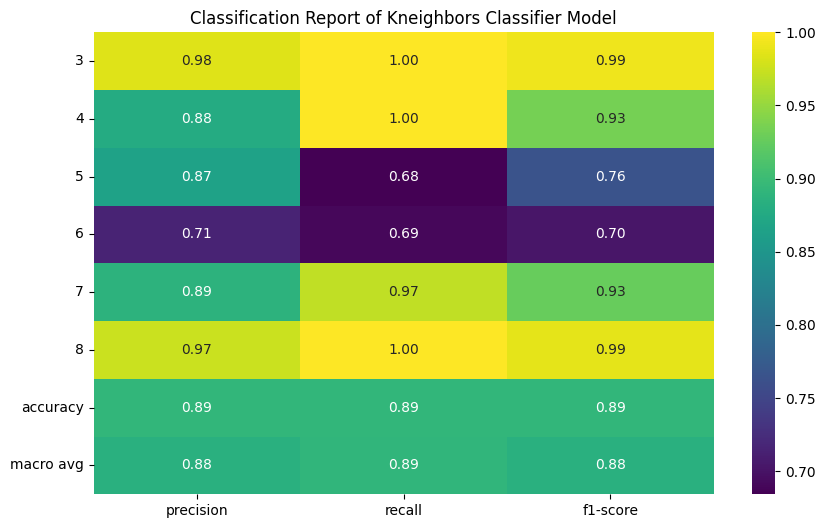

In [218]:
KN_report = classification_report(y_test, KN_pred, output_dict=True)
# Convert the classification report to a DataFrame
KN_report_df = pd.DataFrame(KN_report).transpose()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(KN_report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt=".2f")
plt.title("Classification Report of Kneighbors Classifier Model")
plt.show()

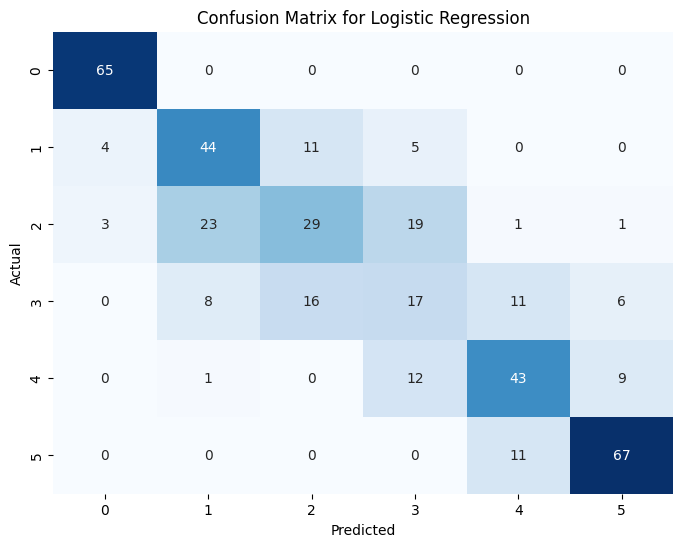

In [220]:
cm = confusion_matrix(y_test, LR_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',cbar=False)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

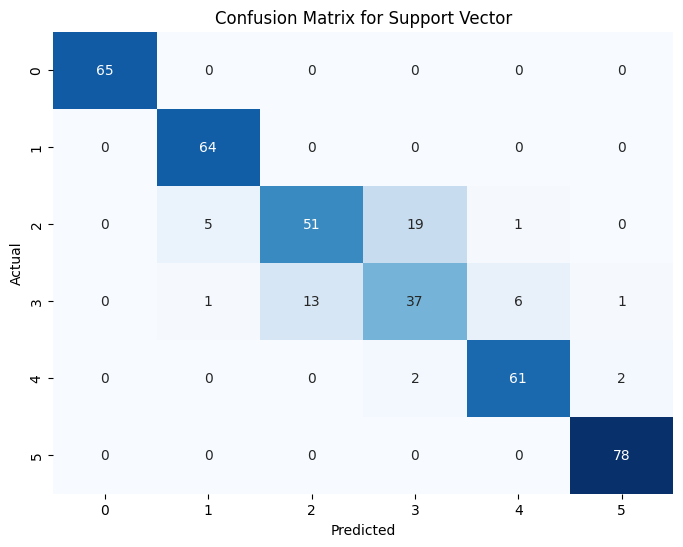

In [222]:
cm = confusion_matrix(y_test, svc_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',cbar=False)
plt.title('Confusion Matrix for Support Vector')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

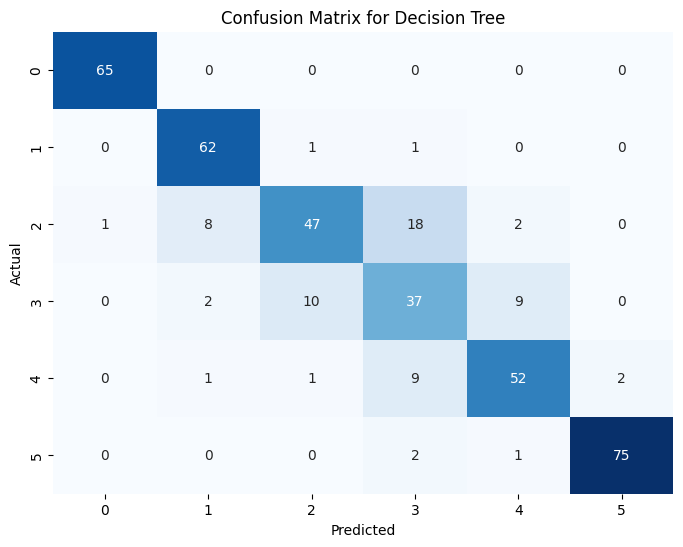

In [224]:
cm = confusion_matrix(y_test, DT_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',cbar=False)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

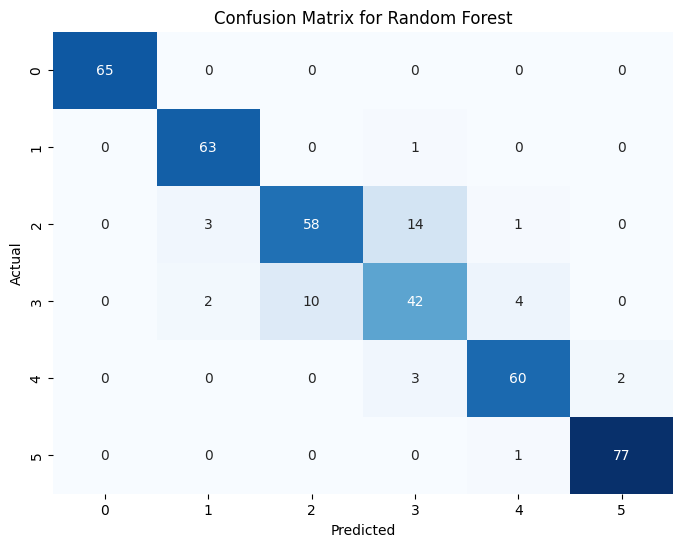

In [226]:
cm = confusion_matrix(y_test, RF_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',cbar=False)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

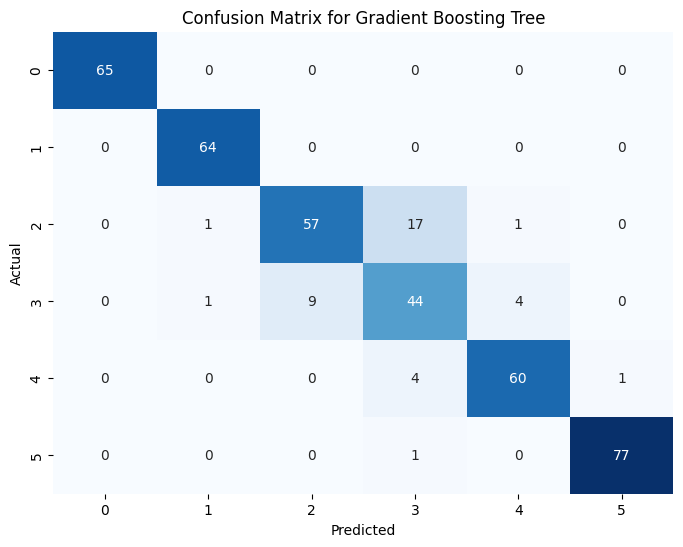

In [228]:
cm = confusion_matrix(y_test, GB_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',cbar=False)
plt.title('Confusion Matrix for Gradient Boosting Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

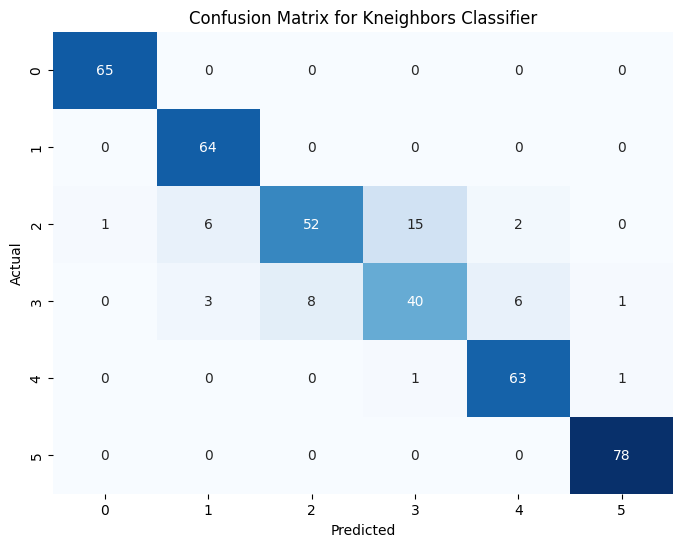

In [230]:
cm = confusion_matrix(y_test, KN_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',cbar=False)
plt.title('Confusion Matrix for Kneighbors Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

C:\Users\Lokesh\AppData\Local\Temp\ipykernel_18028\723156118.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")


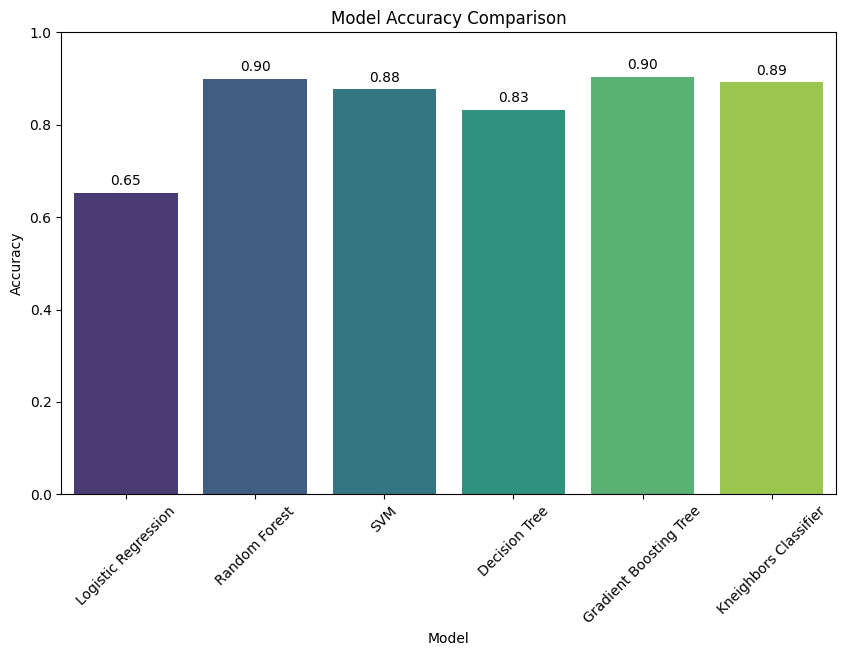

In [232]:
models = {
    'Logistic Regression': LR,
    'Random Forest': RF,
    'SVM': svc,
    'Decision Tree': DT,
    'Gradient Boosting Tree': GB,
    'Kneighbors Classifier': KN
}
accuracies = {}

for model_name, model in models.items():
    y_test_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    accuracies[model_name] = accuracy

plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")

for i, (model_name, accuracy) in enumerate(accuracies.items()):
    plt.text(i, accuracy + 0.01, f"{accuracy:.2f}", ha='center', va='bottom', fontsize=10)

plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()